In [51]:
import pandas as pd
import matplotlib.pyplot as plt

In [105]:
df = pd.read_csv("Summer_Olympics_Host.csv")
df.head(5)

,Year,Country,Total_Medals,Gold,Silver,Bronze,Athletes,Event,Sport,Host
0,1896,Greece,44,10,17,17,102,39,9,1
1,1896,USA,19,11,6,2,14,16,3,0
2,1896,Germany,14,7,5,2,19,27,6,0
3,1896,France,11,5,4,2,12,18,6,0
4,1896,UK,9,3,3,3,10,19,7,0


In [106]:
df_usa = df.loc[df['Country']=='USA'].reset_index(drop=True)
df_usa

,Year,Country,Total_Medals,Gold,Silver,Bronze,Athletes,Event,Sport,Host
0,1896,USA,19,11,6,2,14,16,3,0
1,1900,USA,54,21,16,17,75,41,10,0
2,1904,USA,230,76,79,75,524,95,18,1
3,1906,USA,23,12,5,6,38,28,5,0
4,1908,USA,46,22,12,12,122,52,10,0
5,1912,USA,63,26,18,19,174,68,11,0
6,1920,USA,95,41,27,27,288,113,18,0
7,1924,USA,99,45,27,27,299,108,18,0
8,1928,USA,56,22,18,16,280,96,15,0
9,1932,USA,110,44,36,30,474,122,17,1


In [123]:
usa_train = df_usa.loc[df_usa['Year']<=2000]
usa_test = df_usa.loc[df_usa['Year']>2000]

In [124]:
X_train = usa_train[['Year','Athletes', 'Event', 'Host']].values
X_train

array([[1896,   14,   16,    0],
       [1900,   75,   41,    0],
       [1904,  524,   95,    1],
       [1906,   38,   28,    0],
       [1908,  122,   52,    0],
       [1912,  174,   68,    0],
       [1920,  288,  113,    0],
       [1924,  299,  108,    0],
       [1928,  280,   96,    0],
       [1932,  474,  122,    1],
       [1936,  359,  127,    0],
       [1948,  300,  126,    0],
       [1952,  286,  133,    0],
       [1956,  305,  144,    0],
       [1960,  292,  147,    0],
       [1964,  346,  159,    0],
       [1968,  357,  167,    0],
       [1972,  400,  185,    0],
       [1976,  396,  189,    0],
       [1984,  522,  217,    1],
       [1988,  527,  230,    0],
       [1992,  545,  248,    0],
       [1996,  648,  263,    1],
       [2000,  586,  265,    0]])

In [125]:
y_train = usa_train["Total_Medals"]
y_train = y_train.values.reshape(-1,1)
y_train

array([[ 19],
       [ 54],
       [230],
       [ 23],
       [ 46],
       [ 63],
       [ 95],
       [ 99],
       [ 56],
       [110],
       [ 57],
       [ 84],
       [ 76],
       [ 74],
       [ 71],
       [ 90],
       [107],
       [ 94],
       [ 94],
       [173],
       [ 94],
       [108],
       [101],
       [ 91]])

In [126]:
print(X_train.shape, y_train.shape)

(24, 4) (24, 1)


In [127]:
usa_test

,Year,Country,Total_Medals,Gold,Silver,Bronze,Athletes,Event,Sport,Host
24,2004,USA,101,36,39,26,533,254,31,0
25,2008,USA,110,36,39,35,588,258,32,0
26,2012,USA,103,46,28,29,529,245,31,0
27,2016,USA,121,46,37,38,555,245,33,0


In [112]:
new_row = pd.Series(data={'Year':2020, 'Country':'USA', 'Athletes':340, 
                          'Host':0, 'Sport':25, 'Event':191}, name='0')
new_row

Year        2020
Country      USA
Athletes     340
Host           0
Sport         25
Event        191
Name: 0, dtype: object

In [113]:
usa_test = usa_test.append(new_row, ignore_index=False)
usa_test

,Year,Country,Total_Medals,Gold,Silver,Bronze,Athletes,Event,Sport,Host
24,2004,USA,101.0,36.0,39.0,26.0,533,254,31,0
25,2008,USA,110.0,36.0,39.0,35.0,588,258,32,0
26,2012,USA,103.0,46.0,28.0,29.0,529,245,31,0
27,2016,USA,121.0,46.0,37.0,38.0,555,245,33,0
0,2020,USA,NaN,NaN,NaN,NaN,340,191,25,0


In [128]:
X_test = usa_test[['Year','Athletes', 'Event', 'Host']].values
X_test

array([[2004,  533,  254,    0],
       [2008,  588,  258,    0],
       [2012,  529,  245,    0],
       [2016,  555,  245,    0]])

In [129]:
y_test = usa_test["Total_Medals"]
y_test = y_test.values.reshape(-1,1)
y_test

array([[101],
       [110],
       [103],
       [121]])

In [130]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [131]:
model.fit(X_train, y_train)

LinearRegression()

In [132]:
# print('Weight coefficients: ', model.coef_)
# print('y-axis intercept: ', model.intercept_) 

In [133]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X_test)

# Score the prediction with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 81.60138744828683
R-squared (R2 ): -0.33362839547761935


In [134]:
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [19]


NameError: name 'predictions' is not defined

In [135]:
pd.DataFrame({"Actual": y, "Predicted": predictions, "Error": predicted - y})[["Actual","Predicted", "Error"]]

NameError: name 'predictions' is not defined

In [143]:
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.6908717985866675
Testing Score: -0.33362839547761935


Text(0.5, 1.0, 'Residual Plot')

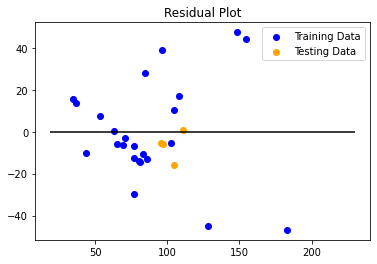

In [137]:
# Residuals for the Training and Testing data
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data");
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [145]:
pd.DataFrame({"Predicted": (np.ravel(predicted)), "Actual": (np.ravel(y_test)), "Error": np.ravel(predicted) - np.ravel(y_test)})

,Predicted,Actual,Error
0,95.470432,101,-5.529568
1,110.856396,110,0.856396
2,97.051325,103,-5.948675
3,104.884502,121,-16.115498


In [140]:
import numpy as np